In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/processed_samples.zip -d /content/

Archive:  /content/drive/MyDrive/processed_samples.zip
  inflating: /content/processed_samples_2008.pkl  
  inflating: /content/processed_samples_2004.pkl  
  inflating: /content/processed_samples_2007.pkl  
  inflating: /content/processed_samples_2006.pkl  
  inflating: /content/processed_samples_2005.pkl  
  inflating: /content/processed_samples_2003.pkl  
  inflating: /content/processed_samples_2002.pkl  
  inflating: /content/processed_samples_2001.pkl  
  inflating: /content/processed_samples_1997.pkl  
  inflating: /content/processed_samples_2000.pkl  
  inflating: /content/processed_samples_1996.pkl  
  inflating: /content/processed_samples_1994.pkl  
  inflating: /content/processed_samples_1999.pkl  
  inflating: /content/processed_samples_1998.pkl  
  inflating: /content/processed_samples_1995.pkl  
  inflating: /content/processed_samples_1991.pkl  
  inflating: /content/processed_samples_1992.pkl  
  inflating: /content/processed_samples_1993.pkl  
  inflating: /content/proce

In [3]:
import pickle

pkl_paths = [
    "/content/processed_samples_1979.pkl",
    "/content/processed_samples_1980.pkl",
    "/content/processed_samples_1981.pkl",
    "/content/processed_samples_1982.pkl",
    "/content/processed_samples_1983.pkl",
    "/content/processed_samples_1984.pkl",
    "/content/processed_samples_1985.pkl",
    "/content/processed_samples_1986.pkl",
    "/content/processed_samples_1987.pkl",
    "/content/processed_samples_1988.pkl",
    "/content/processed_samples_1989.pkl",
    "/content/processed_samples_1990.pkl",
    "/content/processed_samples_1991.pkl",
    "/content/processed_samples_1992.pkl",
    "/content/processed_samples_1993.pkl",
    "/content/processed_samples_1994.pkl",
    "/content/processed_samples_1995.pkl",
    "/content/processed_samples_1996.pkl",
    "/content/processed_samples_1997.pkl",
    "/content/processed_samples_1998.pkl",
    "/content/processed_samples_1999.pkl",
    "/content/processed_samples_2000.pkl",
    "/content/processed_samples_2001.pkl",
    "/content/processed_samples_2002.pkl",
    "/content/processed_samples_2003.pkl",
    "/content/processed_samples_2004.pkl",
    "/content/processed_samples_2005.pkl",
    "/content/processed_samples_2006.pkl",
    "/content/processed_samples_2007.pkl",
    "/content/processed_samples_2008.pkl",
    "/content/processed_samples_2009.pkl",
    "/content/processed_samples_2010.pkl",
    "/content/processed_samples_2011.pkl"
]

all_samples = []

for path in pkl_paths:
    print(f"Loading: {path}")
    with open(path, "rb") as f:
        data = pickle.load(f)

    print(f"  → Loaded {len(data)} samples")
    all_samples.extend(data)

print("\nTOTAL combined samples:", len(all_samples))

MERGED_PATH = "/content/processed_samples_merged.pkl"
with open(MERGED_PATH, "wb") as f:
    pickle.dump(all_samples, f)

print(f"\nMerged file saved to: {MERGED_PATH}")


Loading: /content/processed_samples_1979.pkl
  → Loaded 848 samples
Loading: /content/processed_samples_1980.pkl
  → Loaded 786 samples
Loading: /content/processed_samples_1981.pkl
  → Loaded 740 samples
Loading: /content/processed_samples_1982.pkl
  → Loaded 1024 samples
Loading: /content/processed_samples_1983.pkl
  → Loaded 433 samples
Loading: /content/processed_samples_1984.pkl
  → Loaded 622 samples
Loading: /content/processed_samples_1985.pkl
  → Loaded 987 samples
Loading: /content/processed_samples_1986.pkl
  → Loaded 1069 samples
Loading: /content/processed_samples_1987.pkl
  → Loaded 801 samples
Loading: /content/processed_samples_1988.pkl
  → Loaded 476 samples
Loading: /content/processed_samples_1989.pkl
  → Loaded 902 samples
Loading: /content/processed_samples_1990.pkl
  → Loaded 822 samples
Loading: /content/processed_samples_1991.pkl
  → Loaded 991 samples
Loading: /content/processed_samples_1992.pkl
  → Loaded 892 samples
Loading: /content/processed_samples_1993.pkl
 

In [4]:
import pickle

PICKLE_PATH = "/content/processed_samples_merged.pkl"

with open(PICKLE_PATH, "rb") as f:
    samples = pickle.load(f)

print("Total samples:", len(samples))

Total samples: 24975


In [5]:
uv_shapes = set()
sst_shapes = set()
p_shapes = set()

bad_samples = 0

for s in samples:
    env_list = s.get("environmental_data", [])
    if not env_list:
        bad_samples += 1
        continue

    for env in env_list:
        uv_shapes.add(env["wind"]["u_300"].shape)
        sst_shapes.add(env["sst"].shape)
        p_shapes.add(env["geopotential"].shape)

print("Unique UV shapes:", uv_shapes)
print("Unique SST shapes:", sst_shapes)
print("Unique Geopotential shapes:", p_shapes)
print("Samples with empty environmental_data:", bad_samples)

Unique UV shapes: {(21, 21)}
Unique SST shapes: {(21, 21)}
Unique Geopotential shapes: {(21, 41)}
Samples with empty environmental_data: 0


In [6]:
import pickle
import numpy as np

PICKLE_PATH = "/content/processed_samples_merged.pkl"

with open(PICKLE_PATH, "rb") as f:
    samples = pickle.load(f)

traj_shapes = set()
env_lengths = set()
missing_target_count = 0

FORECAST_HOURS = [6, 12, 24, 48, 72]

for s in samples:
    traj = s["input_trajectory"]
    env  = s["environmental_data"]
    traj_shapes.add(traj.shape)
    env_lengths.add(len(env))

    if any(s["targets"].get(f"t+{h}h") is None for h in FORECAST_HOURS):
        missing_target_count += 1

print("Trajectory shapes:", traj_shapes)
print("Env list lengths:", env_lengths)
print("Samples missing any target:", missing_target_count)

Trajectory shapes: {(8, 6)}
Env list lengths: {8}
Samples missing any target: 639


In [7]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler

PICKLE_PATH = "/content/processed_samples_merged.pkl"

FORECAST_HOURS = [6, 12, 24, 48, 72]
N_STEPS = 8

with open(PICKLE_PATH, "rb") as f:
    samples = pickle.load(f)

print("Total samples in file:", len(samples))

P_H, P_W = None, None
for s in samples:
    env_list = s["environmental_data"]
    if len(env_list) > 0:
        gp0 = env_list[0]["geopotential"]
        P_H, P_W = gp0.shape
        break

print("Inferred geopotential shape:", P_H, P_W)

X_traj_list = []
X_uv_list   = []
X_sst_list  = []
X_p_list    = []
y_list      = []
lat0_list   = []
lon0_list   = []

n_skipped = 0

for s in samples:
    traj     = s["input_trajectory"]
    env_list = s["environmental_data"]
    targets  = s["targets"]
    lat0, lon0 = s["current_position"]

    if traj.shape[0] != N_STEPS:
        n_skipped += 1
        continue
    if len(env_list) != N_STEPS:
        n_skipped += 1
        continue
    if any(targets.get(f"t+{h}h") is None for h in FORECAST_HOURS):
        n_skipped += 1
        continue

    X_traj_list.append(traj)

    uv_t_series = []
    for env in env_list:
        w = env["wind"]
        u300 = w["u_300"]
        v300 = w["v_300"]
        u500 = w["u_500"]
        v500 = w["v_500"]
        u700 = w["u_700"]
        v700 = w["v_700"]
        u850 = w["u_850"]
        v850 = w["v_850"]

        uv_t = np.stack(
            [u300, v300, u500, v500, u700, v700, u850, v850],
            axis=-1
        )
        uv_t_series.append(uv_t)

    uv_sample = np.stack(uv_t_series, axis=0)
    X_uv_list.append(uv_sample)


    sst_t_series = [env["sst"] for env in env_list]
    sst_sample = np.stack(sst_t_series, axis=0)[..., None]
    X_sst_list.append(sst_sample)


    p_t_series = [env["geopotential"] for env in env_list]
    p_sample = np.stack(p_t_series, axis=0)[..., None]
    X_p_list.append(p_sample)

    y_offsets = []
    for h in FORECAST_HOURS:
        t = targets[f"t+{h}h"]
        dlat = t["lat"] - lat0
        dlon = t["lon"] - lon0
        y_offsets.extend([dlat, dlon])
    y_list.append(y_offsets)

    lat0_list.append([lat0])
    lon0_list.append([lon0])

print("Skipped samples:", n_skipped)
print("Kept samples:", len(X_traj_list))

X_traj = np.stack(X_traj_list, axis=0)
X_uv   = np.stack(X_uv_list,   axis=0)
X_sst  = np.stack(X_sst_list,  axis=0)
X_p    = np.stack(X_p_list,    axis=0)
y      = np.stack(y_list,      axis=0)
lat0   = np.array(lat0_list)
lon0   = np.array(lon0_list)

print("X_traj:", X_traj.shape)
print("X_uv:",   X_uv.shape)
print("X_sst:",  X_sst.shape)
print("X_p:",    X_p.shape)
print("y:",      y.shape)

def clean_array(arr, name):
    finite_vals = arr[np.isfinite(arr)]
    mean_val = 0.0 if finite_vals.size == 0 else finite_vals.mean()
    print(f"{name}: mean (finite) = {mean_val}")
    arr_clean = np.nan_to_num(arr, nan=mean_val, posinf=mean_val, neginf=mean_val)
    print(f"{name}: has NaN after cleaning ->", np.isnan(arr_clean).any())
    print(f"{name}: has non-finite after cleaning ->", (~np.isfinite(arr_clean)).any())
    print()
    return arr_clean

X_uv  = clean_array(X_uv,  "X_uv")
X_sst = clean_array(X_sst, "X_sst")
X_p   = clean_array(X_p,   "X_p")

Total samples in file: 24975
Inferred geopotential shape: 21 41
Skipped samples: 639
Kept samples: 24336
X_traj: (24336, 8, 6)
X_uv: (24336, 8, 21, 21, 8)
X_sst: (24336, 8, 21, 21, 1)
X_p: (24336, 8, 21, 41, 1)
y: (24336, 10)
X_uv: mean (finite) = 0.5476067066192627
X_uv: has NaN after cleaning -> False
X_uv: has non-finite after cleaning -> False

X_sst: mean (finite) = 301.556884765625
X_sst: has NaN after cleaning -> False
X_sst: has non-finite after cleaning -> False

X_p: mean (finite) = 57424.51953125
X_p: has NaN after cleaning -> False
X_p: has non-finite after cleaning -> False



In [8]:
eps = 1e-6

traj_mean = X_traj.mean(axis=(0,1), keepdims=True)    # (1,1,6)
traj_std  = X_traj.std(axis=(0,1), keepdims=True) + eps

X_traj = (X_traj - traj_mean) / traj_std

uv_mean = X_uv.mean(axis=(0,1,2,3), keepdims=True)    # (1,1,1,1,8)
uv_std  = X_uv.std(axis=(0,1,2,3), keepdims=True) + eps

X_uv = (X_uv - uv_mean) / uv_std

sst_mean = X_sst.mean(axis=(0,1,2,3), keepdims=True)
sst_std  = X_sst.std(axis=(0,1,2,3), keepdims=True) + eps

X_sst = (X_sst - sst_mean) / sst_std

p_mean = X_p.mean(axis=(0,1,2,3), keepdims=True)
p_std  = X_p.std(axis=(0,1,2,3), keepdims=True) + eps

X_p = (X_p - p_mean) / p_std

y_mean = y.mean(axis=0, keepdims=True)                 # (1,10)
y_std  = y.std(axis=0, keepdims=True) + eps

y = (y - y_mean) / y_std


In [9]:
from sklearn.model_selection import train_test_split

idx = np.arange(len(X_traj))
train_idx, test_idx = train_test_split(idx, test_size=0.1, random_state=42)
train_idx, val_idx  = train_test_split(train_idx, test_size=0.1111, random_state=42)

train_X_uv   = X_uv[train_idx]
train_X_sst  = X_sst[train_idx]
train_X_p    = X_p[train_idx]
train_X_traj = X_traj[train_idx]
train_y      = y[train_idx]

val_X_uv   = X_uv[val_idx]
val_X_sst  = X_sst[val_idx]
val_X_p    = X_p[val_idx]
val_X_traj = X_traj[val_idx]
val_y      = y[val_idx]

test_X_uv   = X_uv[test_idx]
test_X_sst  = X_sst[test_idx]
test_X_p    = X_p[test_idx]
test_X_traj = X_traj[test_idx]
test_y      = y[test_idx]

In [14]:
N_STEPS = train_X_uv.shape[1]
H_uv, W_uv   = train_X_uv.shape[2], train_X_uv.shape[3]
H_sst, W_sst = train_X_sst.shape[2], train_X_sst.shape[3]
H_p, W_p     = train_X_p.shape[2], train_X_p.shape[3]

F_TRAJ = train_X_traj.shape[2]
OUT_DIM = train_y.shape[1]


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, Model

uv_input = layers.Input(shape=(N_STEPS, H_uv, W_uv, 8), name="uv_input")
uv_out = layers.TimeDistributed(
    layers.Conv2D(16, kernel_size=(9, 9), strides=3, activation="relu")
)(uv_input)
uv_out = layers.TimeDistributed(layers.BatchNormalization())(uv_out)
uv_out = layers.TimeDistributed(
    layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="valid")
)(uv_out)
uv_flat  = layers.Flatten()(uv_out)
uv_dense = layers.Dense(128, activation="relu")(uv_flat)
uv_dense = layers.Dense(32,  activation="relu")(uv_dense)

sst_input = layers.Input(shape=(N_STEPS, H_sst, W_sst, 1), name="sst_input")
sst_out = layers.TimeDistributed(
    layers.Conv2D(8, kernel_size=(9, 9), strides=3, activation="relu")
)(sst_input)
sst_out = layers.TimeDistributed(layers.BatchNormalization())(sst_out)
sst_out = layers.TimeDistributed(
    layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="valid")
)(sst_out)
sst_flat  = layers.Flatten()(sst_out)
sst_dense = layers.Dense(128, activation="relu")(sst_flat)
sst_dense = layers.Dense(32,  activation="relu")(sst_dense)

p_input = layers.Input(shape=(N_STEPS, H_p, W_p, 1), name="p_input")
p_out = layers.TimeDistributed(
    layers.Conv2D(16, kernel_size=(9, 15), strides=3, activation="relu")
)(p_input)
p_out = layers.TimeDistributed(layers.BatchNormalization())(p_out)
p_out = layers.TimeDistributed(
    layers.MaxPool2D(pool_size=(3, 5), strides=2, padding="valid")
)(p_out)
p_flat  = layers.Flatten()(p_out)
p_dense = layers.Dense(128, activation="relu")(p_flat)
p_dense = layers.Dense(32,  activation="relu")(p_dense)

traj_input = layers.Input(shape=(N_STEPS, F_TRAJ), name="traj_input")
gru_1 = layers.GRU(128, return_sequences=True,  activation="relu")(traj_input)
gru_2 = layers.GRU(32,  return_sequences=False, activation="relu")(gru_1)

merged = layers.Concatenate(axis=-1)([uv_dense, sst_dense, p_dense, gru_2])

output = layers.Dense(OUT_DIM, activation="linear", name="output")(merged)

model = Model(
    inputs=[uv_input, sst_input, p_input, traj_input],
    outputs=output,
)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=2280,
    decay_rate=0.94,
    staircase=True,
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    loss="mean_squared_error",
    optimizer=optimizer,
    metrics=["mae", "mape"],
)

model.summary()

checkpoint_path = "cnn_gru_72.weights.h5"
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
)

history = model.fit(
    [train_X_uv, train_X_sst, train_X_p, train_X_traj],
    train_y,
    validation_data=([val_X_uv, val_X_sst, val_X_p, val_X_traj], val_y),
    epochs=100,
    batch_size=64,
    callbacks=checkpoint_cb,
    verbose=2,
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ uv_input            │ (None, 8, 21, 21, │          0 │ -                 │
│ (InputLayer)        │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sst_input           │ (None, 8, 21, 21, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ p_input             │ (None, 8, 21, 41, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed    │ (None, 8, 5, 5,   │     10,384 │ uv_input[0][0]    │
│ (TimeDistributed)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_3  │ (None, 8, 5, 5,   │        656 │ sst_input[0][0]   │
│ (TimeDistributed)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_6  │ (None, 8, 5, 9,   │      2,176 │ p_input[0][0]     │
│ (TimeDistributed)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_1  │ (None, 8, 5, 5,   │         64 │ time_distributed… │
│ (TimeDistributed)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_4  │ (None, 8, 5, 5,   │         32 │ time_distributed… │
│ (TimeDistributed)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_7  │ (None, 8, 5, 9,   │         64 │ time_distributed… │
│ (TimeDistributed)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_2  │ (None, 8, 2, 2,   │          0 │ time_distributed… │
│ (TimeDistributed)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_5  │ (None, 8, 2, 2,   │          0 │ time_distributed… │
│ (TimeDistributed)   │ 8)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_8  │ (None, 8, 2, 3,   │          0 │ time_distributed… │
│ (TimeDistributed)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 512)       │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 256)       │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 768)       │          0 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ traj_input          │ (None, 8, 6)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     65,664 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 291,818 (1.11 MB)

 Trainable params: 291,738 (1.11 MB)

 Non-trainable params: 80 (320.00 B)

Epoch 1/100
305/305 - 48s - 157ms/step - loss: 0.7626 - mae: 0.5662 - mape: 644.5408 - val_loss: 0.5103 - val_mae: 0.4507 - val_mape: 364.9450
Epoch 2/100
305/305 - 3s - 10ms/step - loss: 0.5143 - mae: 0.4304 - mape: 593.5323 - val_loss: 0.4358 - val_mae: 0.3978 - val_mape: 335.9154
Epoch 3/100
305/305 - 3s - 10ms/step - loss: 0.4598 - mae: 0.3937 - mape: 581.9269 - val_loss: 0.4229 - val_mae: 0.3908 - val_mape: 337.3344
Epoch 4/100
305/305 - 3s - 10ms/step - loss: 0.4265 - mae: 0.3720 - mape: 633.8126 - val_loss: 0.3876 - val_mae: 0.3620 - val_mape: 292.6737
Epoch 5/100
305/305 - 3s - 11ms/step - loss: 0.4038 - mae: 0.3575 - mape: 664.0695 - val_loss: 0.3861 - val_mae: 0.3619 - val_mape: 292.8278
Epoch 6/100
305/305 - 3s - 11ms/step - loss: 0.3844 - mae: 0.3474 - mape: 622.8608 - val_loss: 0.3637 - val_mae: 0.3455 - val_mape: 291.9008
Epoch 7/100
305/305 - 3s - 9ms/step - loss: 0.3663 - mae: 0.3390 - mape: 620.0992 - val_loss: 0.3774 - val_mae: 0.3611 - val_mape: 311.8087
Epoch 8/100


In [24]:
!cp /content/cnn_gru_72.weights.h5 "/content/drive/MyDrive/Gen AI/cnn_gru_72.weights.h5"

In [17]:
from sklearn.metrics import mean_squared_error
import math

model.load_weights(checkpoint_path)

yhat_scaled = model.predict([test_X_uv, test_X_sst, test_X_p, test_X_traj])
yhat = yhat_scaled * y_std + y_mean
y_true = test_y * y_std + y_mean

def getDistance(latA, lonA, latB, lonB):
    ra = 6378136.49
    rb = 6356755
    flatten = (ra - rb) / ra

    radLatA = math.radians(latA)
    radLonA = math.radians(lonA)
    radLatB = math.radians(latB)
    radLonB = math.radians(lonB)

    pA = math.atan(rb / ra * math.tan(radLatA))
    pB = math.atan(rb / ra * math.tan(radLatB))

    if radLonA == radLonB:
        x = math.acos(math.sin(pA) * math.sin(pB) +
                      math.cos(pA) * math.cos(pB) * math.cos(0.001))
    else:
        x = math.acos(math.sin(pA) * math.sin(pB) +
                      math.cos(pA) * math.cos(pB) * math.cos(radLonA - radLonB))

    c1 = (math.sin(x) - x) * (math.sin(pA) + math.sin(pB)) ** 2 / math.cos(x / 2) ** 2
    c2 = (math.sin(x) + x) * (math.sin(pA) - math.sin(pB)) ** 2 / math.sin(x / 2) ** 2
    dr = flatten / 8 * (c1 - c2)
    distance = ra * (x + dr) / 1000.0
    return distance

lat0_test = lat0[test_idx, 0]
lon0_test = lon0[test_idx, 0]

n_leads = len(FORECAST_HOURS)  # 5
dis_all_all = []

for i in range(yhat.shape[0]):
    dis_per_sample = []
    for j in range(n_leads):
        dlat_pred = yhat[i, j*2]
        dlon_pred = yhat[i, j*2 + 1]
        dlat_true = y_true[i, j*2]
        dlon_true = y_true[i, j*2 + 1]

        lat_pred = lat0_test[i] + dlat_pred
        lon_pred = lon0_test[i] + dlon_pred
        lat_true = lat0_test[i] + dlat_true
        lon_true = lon0_test[i] + dlon_true

        dis_km = getDistance(lat_pred, lon_pred, lat_true, lon_true)
        dis_per_sample.append(dis_km)
    dis_all_all.append(dis_per_sample)

dis_all_all = np.array(dis_all_all)
mean_distances_per_lead = dis_all_all.mean(axis=0)
print("Lead times (h):", FORECAST_HOURS)
print("Mean distance error per lead (km):", mean_distances_per_lead)

rmse_mag = []
for j in range(n_leads):
    dlat_pred = yhat[:, j*2]
    dlon_pred = yhat[:, j*2 + 1]
    dlat_true = y_true[:, j*2]
    dlon_true = y_true[:, j*2 + 1]

    rmse_dlat = math.sqrt(mean_squared_error(dlat_true, dlat_pred))
    rmse_dlon = math.sqrt(mean_squared_error(dlon_true, dlon_pred))
    rmse = np.sqrt(rmse_dlat**2 + rmse_dlon**2)
    rmse_mag.append(rmse)
    print(f"{FORECAST_HOURS[j]} h: RMSE_dlat = {rmse_dlat:.4f} deg, "
          f"RMSE_dlon = {rmse_dlon:.4f} deg, RMSE_mag = {rmse:.4f} deg")

print("RMSE magnitude per lead (deg):", rmse_mag)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Lead times (h): [6, 12, 24, 48, 72]
Mean distance error per lead (km): [ 34.71817166  51.97261582  88.76295154 194.07535869 350.2283358 ]
6 h: RMSE_dlat = 0.2509 deg, RMSE_dlon = 1.3135 deg, RMSE_mag = 1.3373 deg
12 h: RMSE_dlat = 0.3531 deg, RMSE_dlon = 1.1915 deg, RMSE_mag = 1.2427 deg
24 h: RMSE_dlat = 0.6256 deg, RMSE_dlon = 1.3678 deg, RMSE_mag = 1.5041 deg
48 h: RMSE_dlat = 1.1973 deg, RMSE_dlon = 2.3911 deg, RMSE_mag = 2.6741 deg
72 h: RMSE_dlat = 2.2217 deg, RMSE_dlon = 3.6944 deg, RMSE_mag = 4.3110 deg
RMSE magnitude per lead (deg): [np.float64(1.3372695840293012), np.float64(1.2426808468444401), np.float64(1.5041275574857806), np.float64(2.674076006915671), np.float64(4.3109852343841615)]


In [25]:
import numpy as np

n_leads = len(FORECAST_HOURS)

lat_true = y_true[:, 0::2]
lon_true = y_true[:, 1::2]

lat_pred = yhat[:, 0::2]
lon_pred = yhat[:, 1::2]

print("lat_true shape:", lat_true.shape)
print("lon_true shape:", lon_true.shape)
print("lat_pred shape:", lat_pred.shape)
print("lon_pred shape:", lon_pred.shape)

lat_true shape: (2434, 5)
lon_true shape: (2434, 5)
lat_pred shape: (2434, 5)
lon_pred shape: (2434, 5)


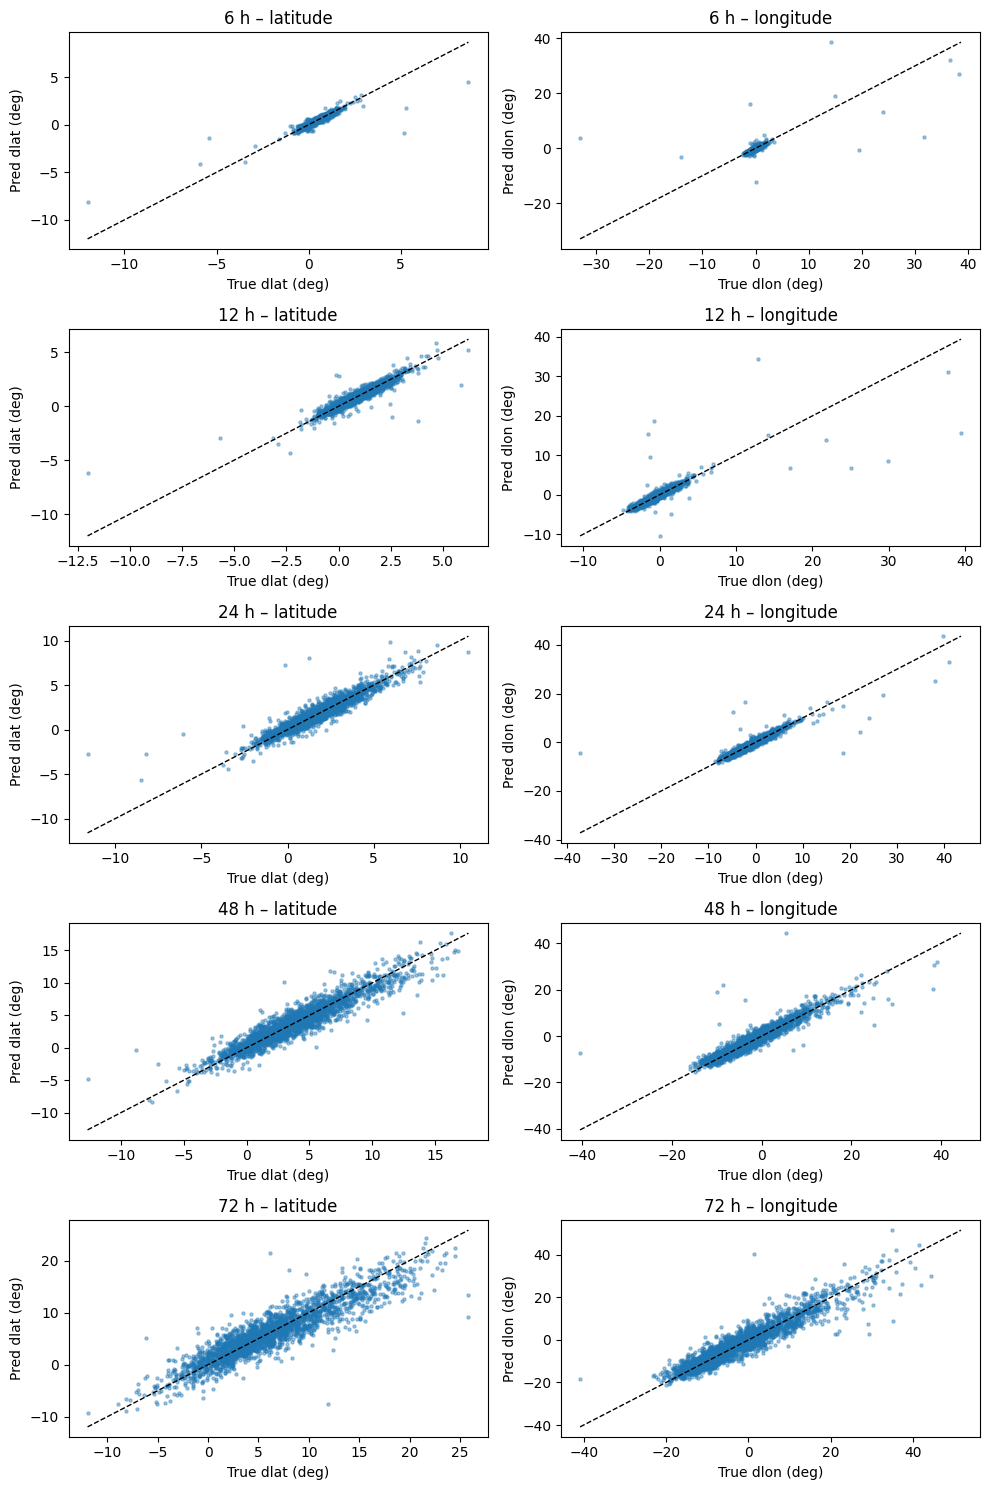

In [26]:
import matplotlib.pyplot as plt

n_leads = len(FORECAST_HOURS)
fig, axes = plt.subplots(n_leads, 2, figsize=(10, 3 * n_leads))

for j, h in enumerate(FORECAST_HOURS):
    ax_lat = axes[j, 0]
    ax_lat.scatter(lat_true[:, j], lat_pred[:, j], s=5, alpha=0.4)
    min_lat = min(lat_true[:, j].min(), lat_pred[:, j].min())
    max_lat = max(lat_true[:, j].max(), lat_pred[:, j].max())
    ax_lat.plot([min_lat, max_lat], [min_lat, max_lat], 'k--', lw=1)
    ax_lat.set_xlabel("True dlat (deg)")
    ax_lat.set_ylabel("Pred dlat (deg)")
    ax_lat.set_title(f"{h} h – latitude")

    ax_lon = axes[j, 1]
    ax_lon.scatter(lon_true[:, j], lon_pred[:, j], s=5, alpha=0.4)
    min_lon = min(lon_true[:, j].min(), lon_pred[:, j].min())
    max_lon = max(lon_true[:, j].max(), lon_pred[:, j].max())
    ax_lon.plot([min_lon, max_lon], [min_lon, max_lon], 'k--', lw=1)
    ax_lon.set_xlabel("True dlon (deg)")
    ax_lon.set_ylabel("Pred dlon (deg)")
    ax_lon.set_title(f"{h} h – longitude")

plt.tight_layout()
plt.show()

In [27]:
!pip install cartopy
import cartopy


=== Plotting sample_idx = 140 ===


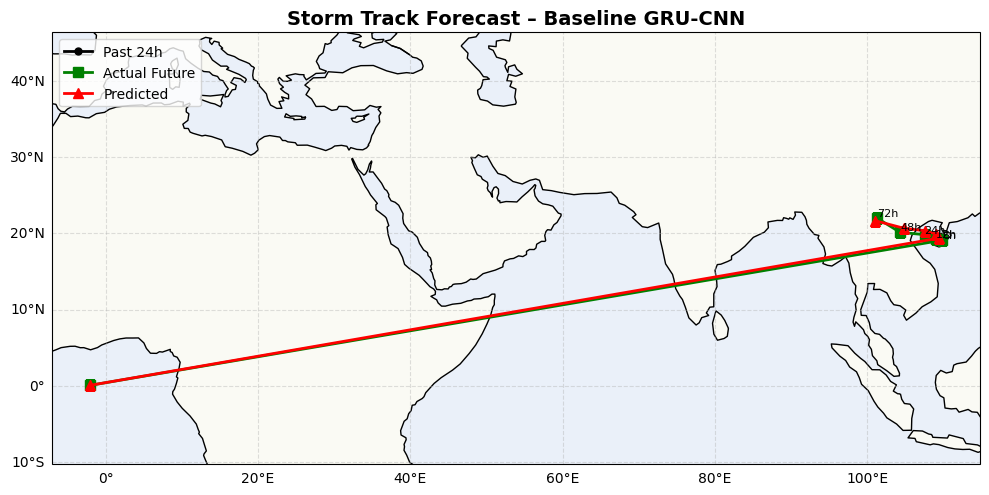


=== Plotting sample_idx = 141 ===


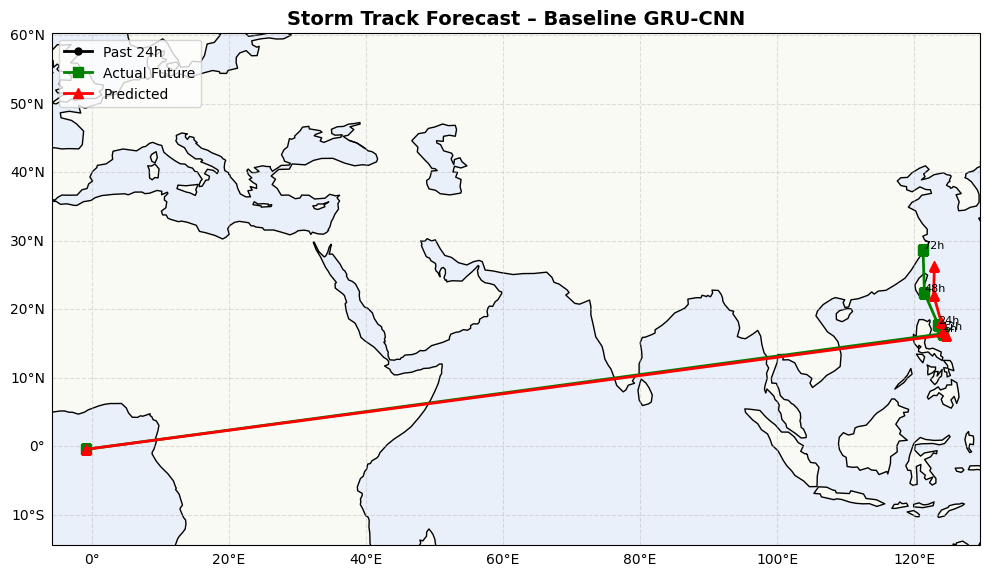


=== Plotting sample_idx = 142 ===


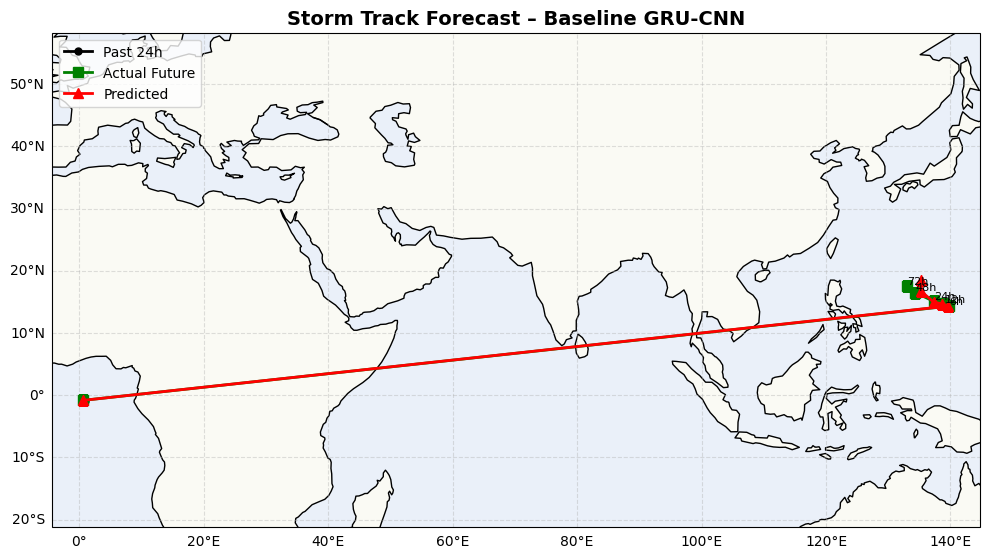


=== Plotting sample_idx = 143 ===


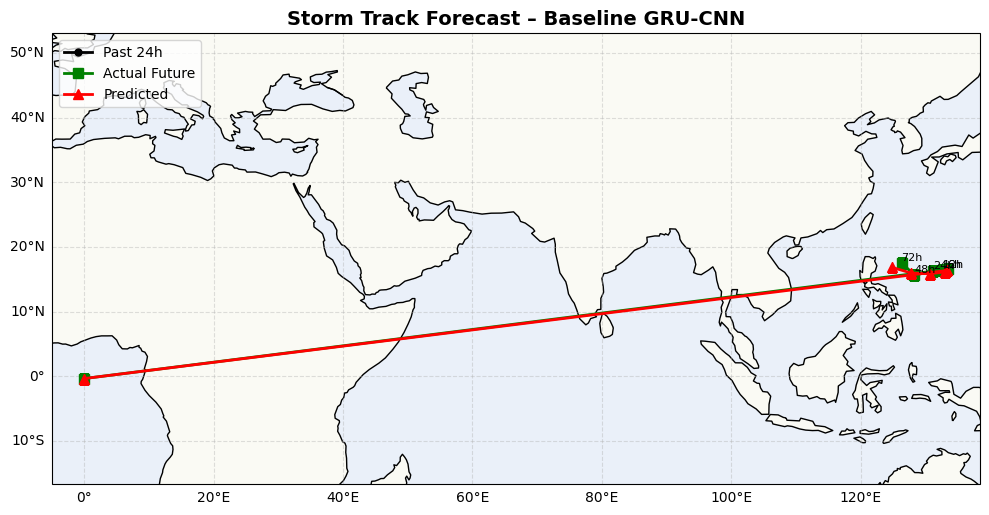


=== Plotting sample_idx = 144 ===


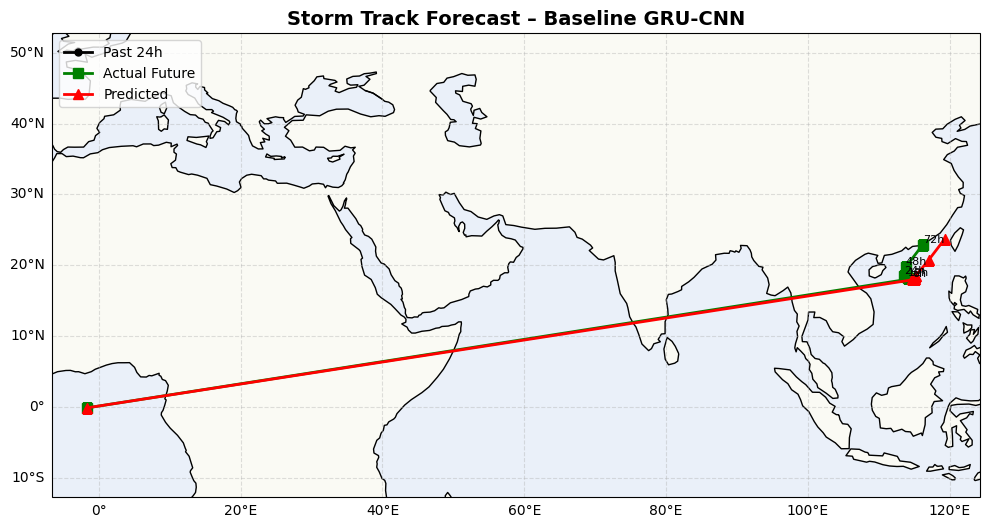


=== Plotting sample_idx = 145 ===


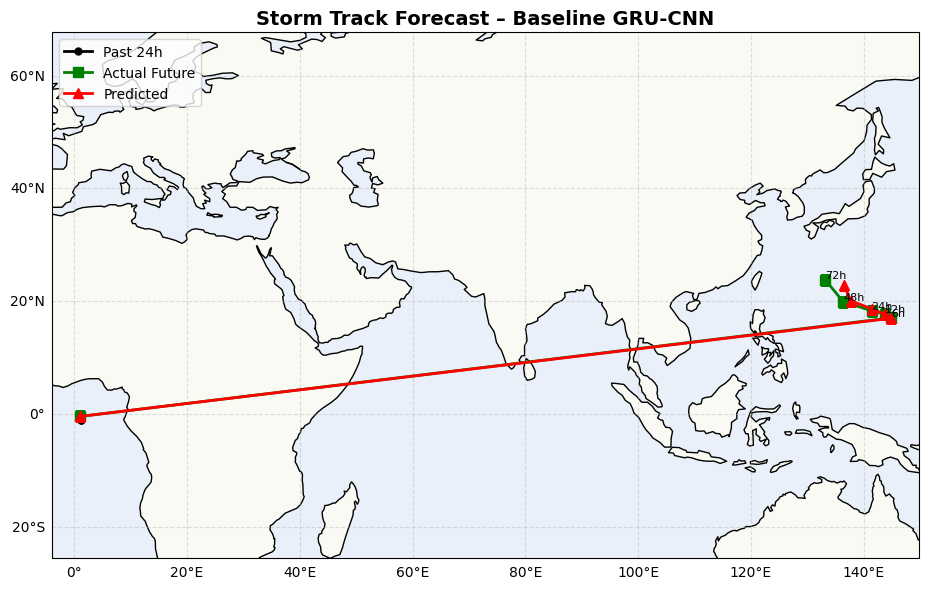


=== Plotting sample_idx = 146 ===


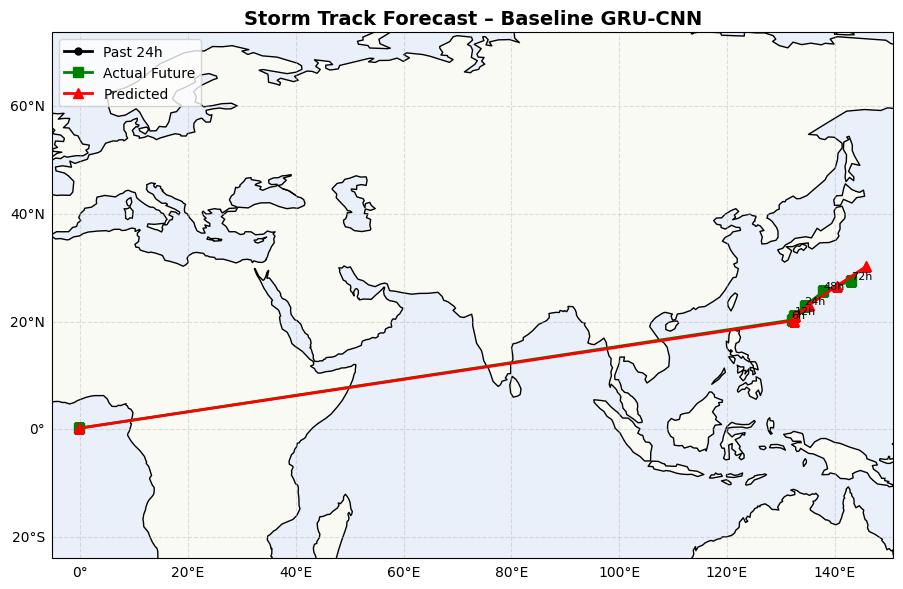


=== Plotting sample_idx = 147 ===


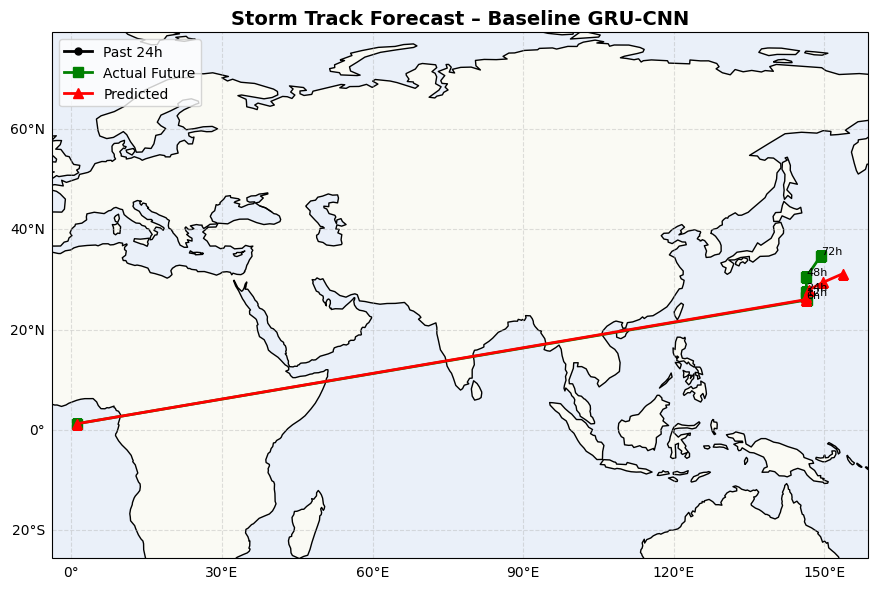


=== Plotting sample_idx = 148 ===


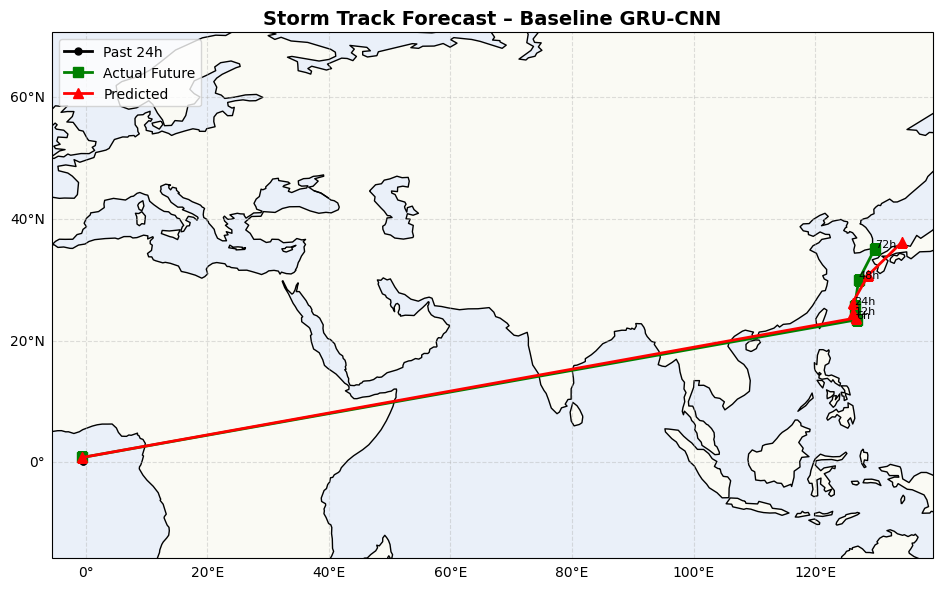


=== Plotting sample_idx = 149 ===


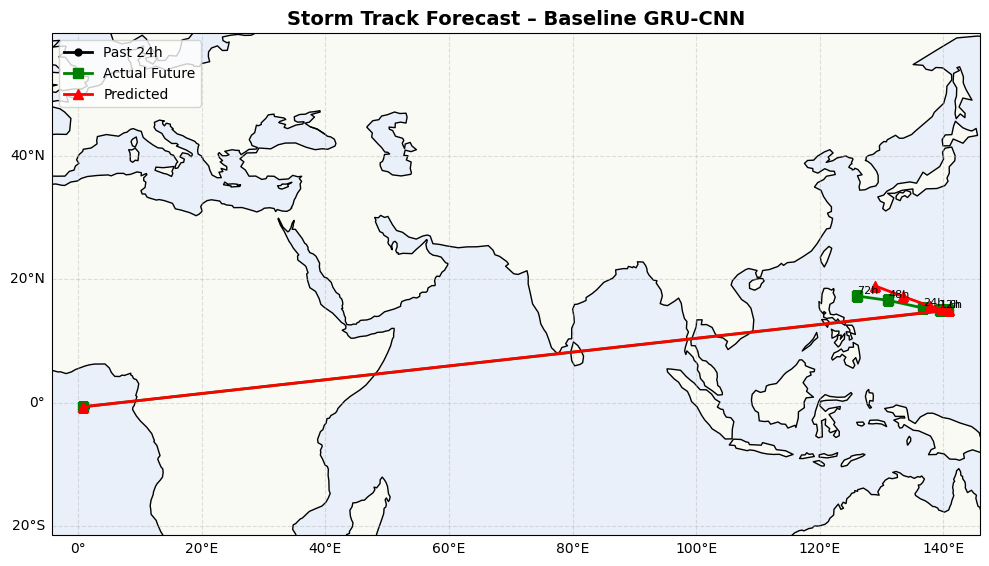

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_baseline_storm(sample_idx=0):
    global_idx = test_idx[sample_idx]

    past = X_traj[global_idx]

    past_lat = past[:, 0]
    past_lon = past[:, 1]

    lat0 = lat0_test[sample_idx]
    lon0 = lon0_test[sample_idx]

    true_offsets = y_true[sample_idx].reshape(-1, 2)
    pred_offsets = yhat[sample_idx].reshape(-1, 2)

    lat_future_true = lat0 + true_offsets[:, 0]
    lon_future_true = lon0 + true_offsets[:, 1]
    lat_future_pred = lat0 + pred_offsets[:, 0]
    lon_future_pred = lon0 + pred_offsets[:, 1]
    all_lats = np.concatenate([past_lat, lat_future_true, lat_future_pred])
    all_lons = np.concatenate([past_lon, lon_future_true, lon_future_pred])

    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("Storm Track Forecast – Baseline GRU-CNN", fontsize=14, fontweight="bold")

    ax.coastlines()
    ax.add_feature(cfeature.LAND, alpha=0.3)
    ax.add_feature(cfeature.OCEAN, alpha=0.2)

    gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.4)
    gl.top_labels = False
    gl.right_labels = False

    ax.plot(
        past_lon, past_lat,
        "-o", color="black", linewidth=2, markersize=5,
        label="Past 24h", transform=ccrs.PlateCarree()
    )

    full_true_lat = np.concatenate([[past_lat[-1]], lat_future_true])
    full_true_lon = np.concatenate([[past_lon[-1]], lon_future_true])

    ax.plot(
        full_true_lon, full_true_lat,
        "-s", color="green", linewidth=2, markersize=7,
        label="Actual Future", transform=ccrs.PlateCarree()
    )

    full_pred_lat = np.concatenate([[past_lat[-1]], lat_future_pred])
    full_pred_lon = np.concatenate([[past_lon[-1]], lon_future_pred])

    ax.plot(
        full_pred_lon, full_pred_lat,
        "-^", color="red", linewidth=2, markersize=7,
        label="Predicted", transform=ccrs.PlateCarree()
    )

    for k, h in enumerate(FORECAST_HOURS):
        ax.text(
            lon_future_true[k], lat_future_true[k], f"{h}h",
            fontsize=8, ha="left", va="bottom", transform=ccrs.PlateCarree()
        )

    margin = 5
    ax.set_extent(
        [all_lons.min() - margin, all_lons.max() + margin,
         all_lats.min() - margin, all_lats.max() + margin]
    )

    ax.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

def plot_batch(start_idx, batch_size=10):
    end_idx = start_idx + batch_size
    for i in range(start_idx, end_idx):
        print(f"\n=== Plotting sample_idx = {i} ===")
        plot_baseline_storm(sample_idx=i)

plot_batch(140, batch_size=10)

In [29]:
import numpy as np

lat_ref = np.array([10.3, 10.4, 11.0, 13.5, 15.5])
lon_ref = np.array([141.5, 140.5, 139.5, 136.5, 134.5])
FORECAST_HOURS = [6, 12, 24, 48, 72]


In [30]:
def get_future_true_coords(sample_idx):
    lat0 = lat0_test[sample_idx]
    lon0 = lon0_test[sample_idx]
    true_offsets = y_true[sample_idx].reshape(-1, 2)
    lat_future_true = lat0 + true_offsets[:, 0]
    lon_future_true = lon0 + true_offsets[:, 1]
    return lat_future_true, lon_future_true


In [31]:
errors = []

for i in range(len(test_idx)):
    lat_f, lon_f = get_future_true_coords(i)

    err = np.sum((lat_f - lat_ref)**2 + (lon_f - lon_ref)**2)
    errors.append((err, i, lat_f, lon_f))

errors_sorted = sorted(errors, key=lambda x: x[0])

print("Top 10 closest storms:\n")
for rank, (err, idx, lat_f, lon_f) in enumerate(errors_sorted[:10], start=1):
    print(f"#{rank}: sample_idx = {idx}, total squared error = {err:.3f}")
    for k, h in enumerate(FORECAST_HOURS):
        print(f"   t+{h:>2}h: lat={lat_f[k]:5.2f}, lon={lon_f[k]:6.2f}")
    print("-" * 40)


Top 10 closest storms:

#1: sample_idx = 2134, total squared error = 11.229
   t+ 6h: lat=10.14, lon=141.90
   t+12h: lat=10.46, lon=141.06
   t+24h: lat=11.34, lon=138.94
   t+48h: lat=12.92, lon=135.04
   t+72h: lat=14.03, lon=132.11
----------------------------------------
#2: sample_idx = 1358, total squared error = 11.418
   t+ 6h: lat=11.95, lon=141.54
   t+12h: lat=11.81, lon=141.31
   t+24h: lat=11.93, lon=140.72
   t+48h: lat=13.29, lon=138.22
   t+72h: lat=16.20, lon=134.95
----------------------------------------
#3: sample_idx = 2433, total squared error = 13.064
   t+ 6h: lat=10.47, lon=141.80
   t+12h: lat=10.60, lon=141.25
   t+24h: lat=11.18, lon=140.50
   t+48h: lat=14.15, lon=139.02
   t+72h: lat=17.40, lon=135.45
----------------------------------------
#4: sample_idx = 1598, total squared error = 13.236
   t+ 6h: lat=11.18, lon=142.96
   t+12h: lat=11.24, lon=141.82
   t+24h: lat=11.55, lon=139.98
   t+48h: lat=13.44, lon=135.94
   t+72h: lat=15.97, lon=131.89
-----

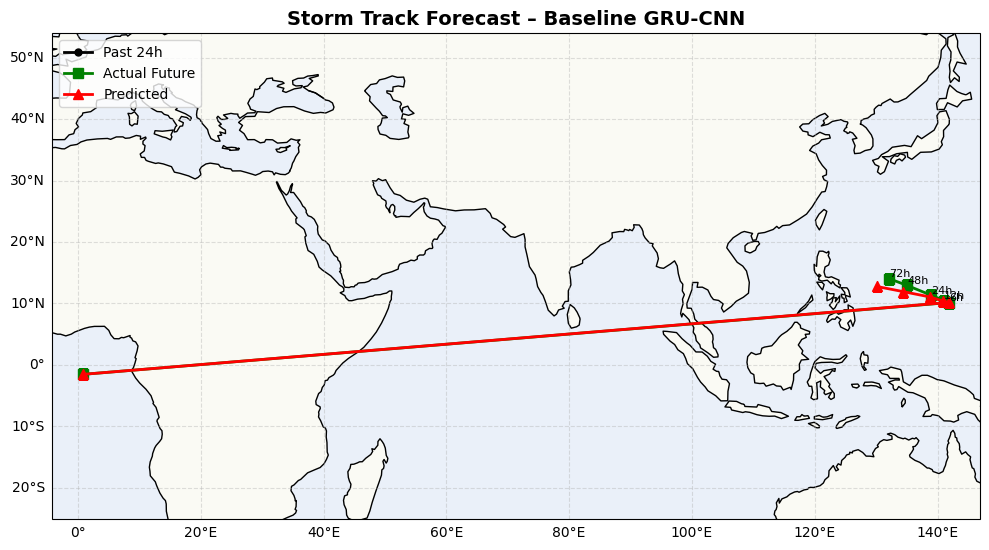

Plotting sample_idx: 2129


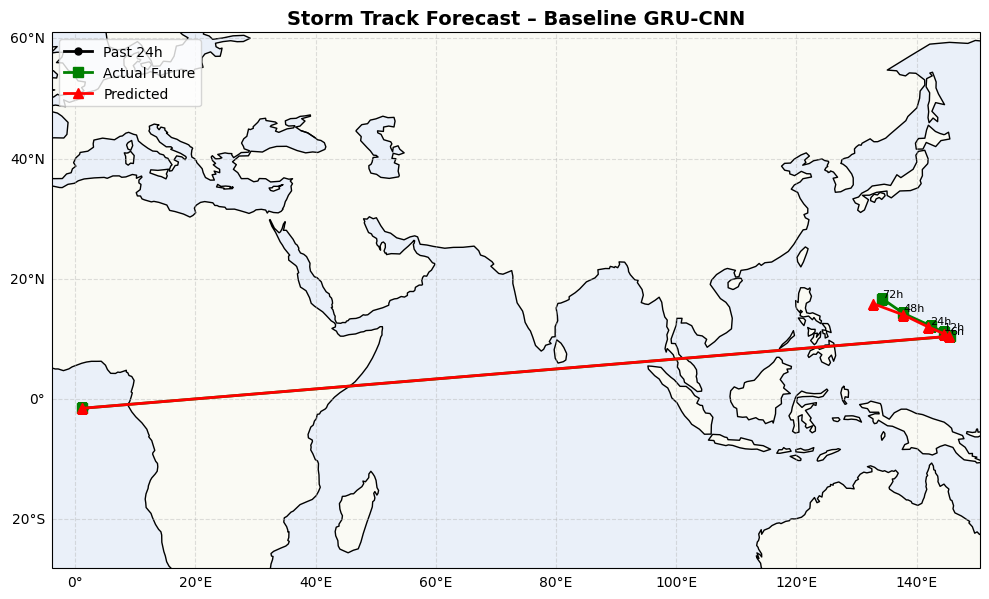

Plotting sample_idx: 1963


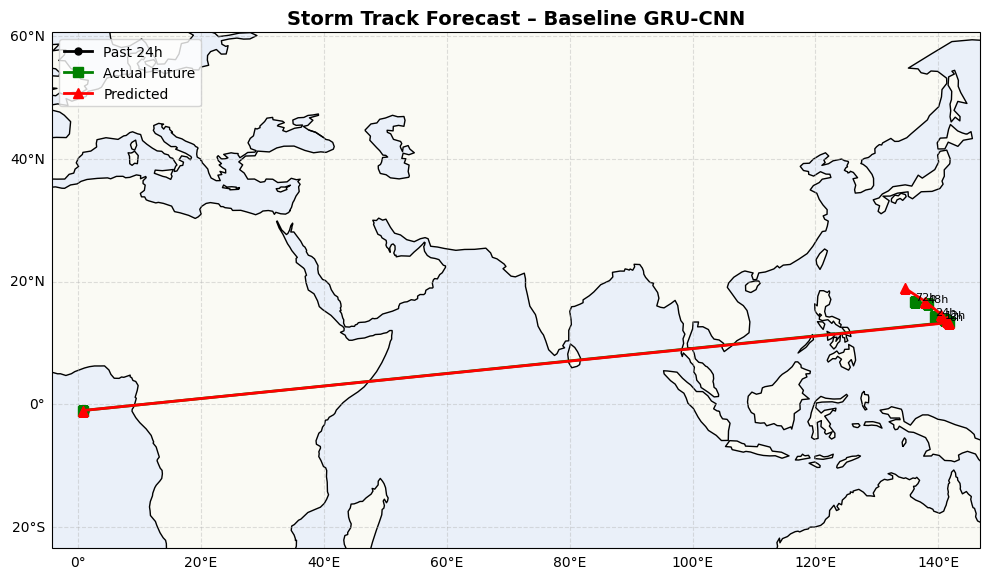

Plotting sample_idx: 591


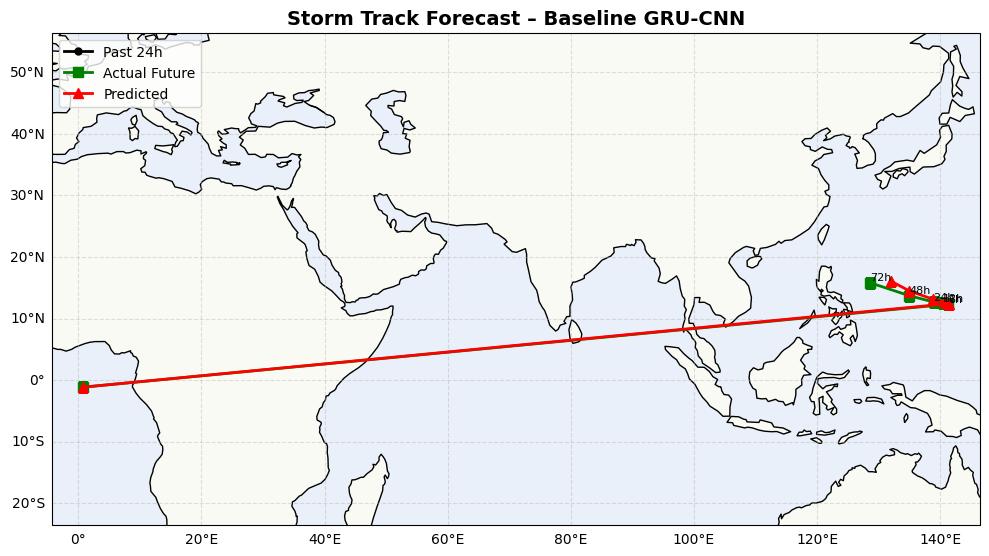

Plotting sample_idx: 1650


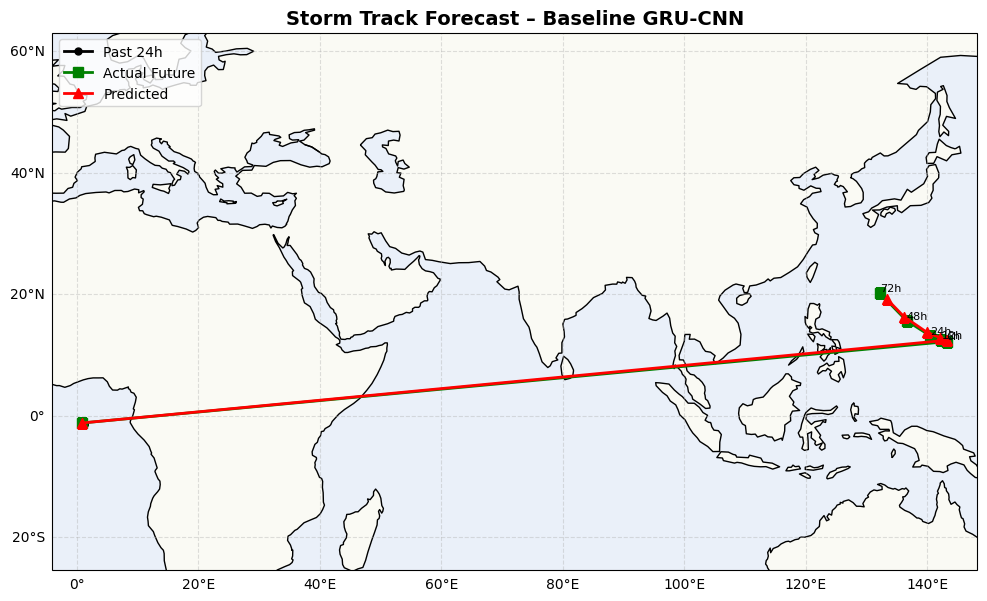

Plotting sample_idx: 2048


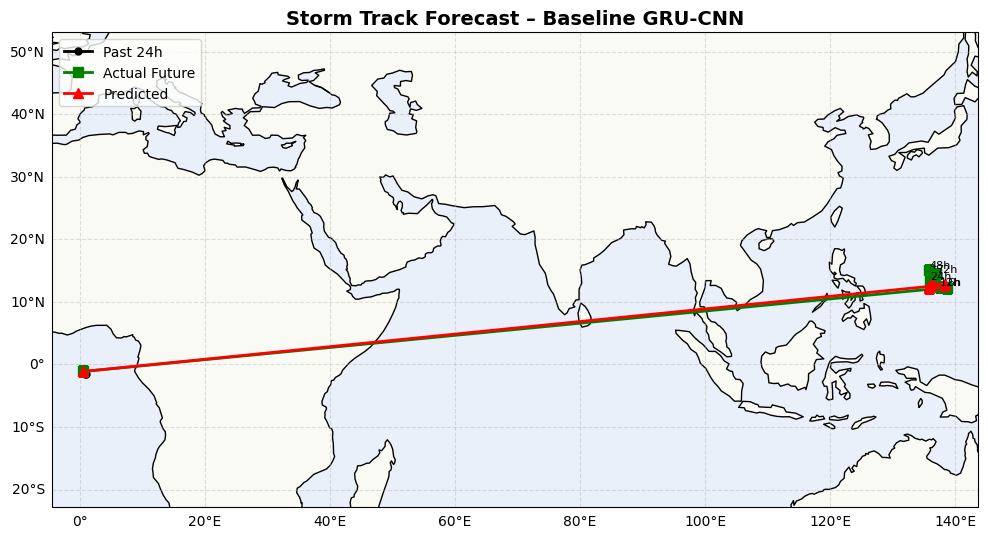

Plotting sample_idx: 539


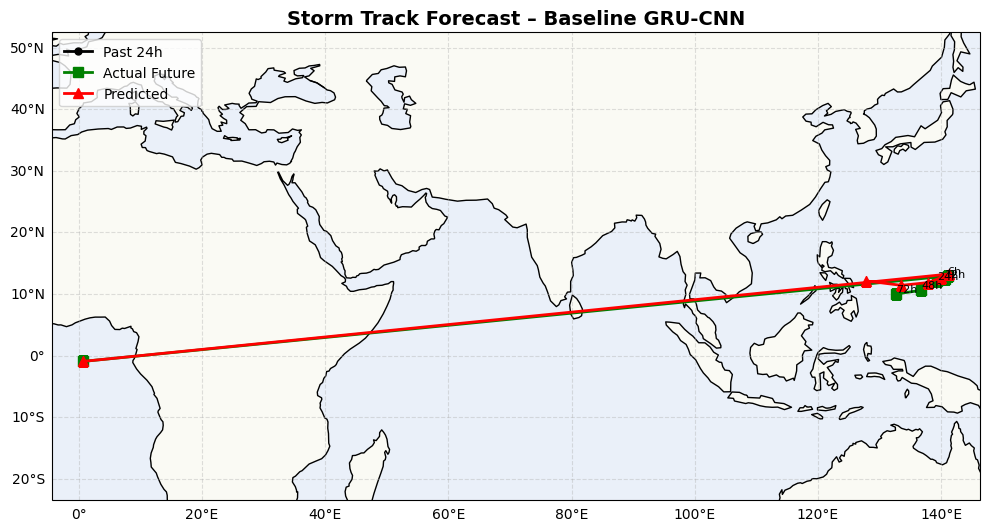

Plotting sample_idx: 1905


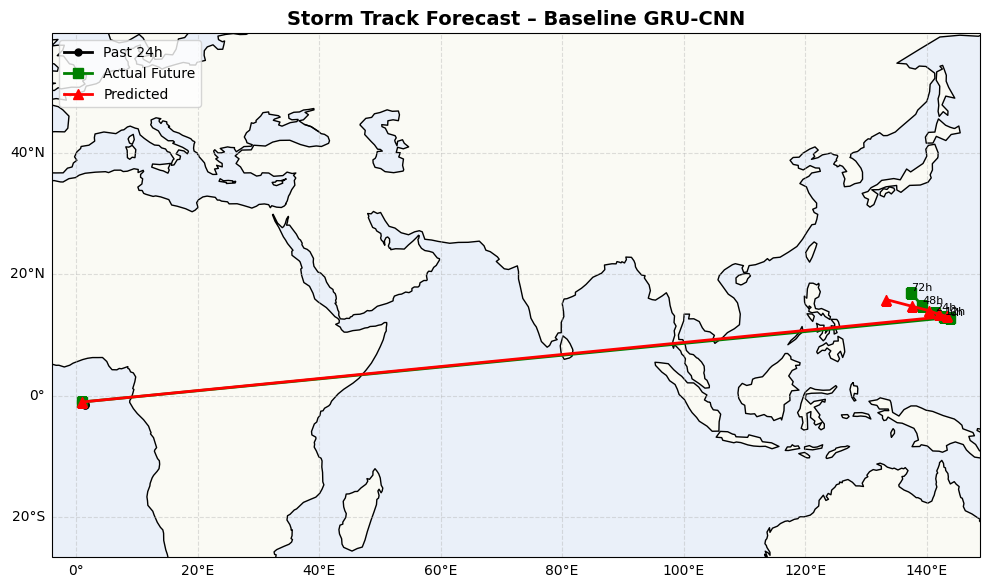

Plotting sample_idx: 78


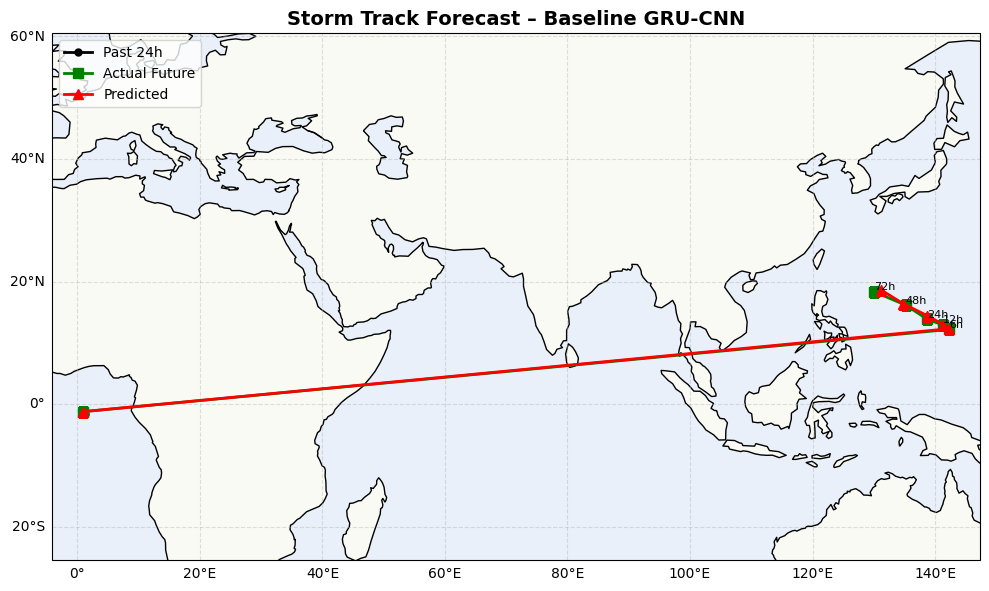

Plotting sample_idx: 796


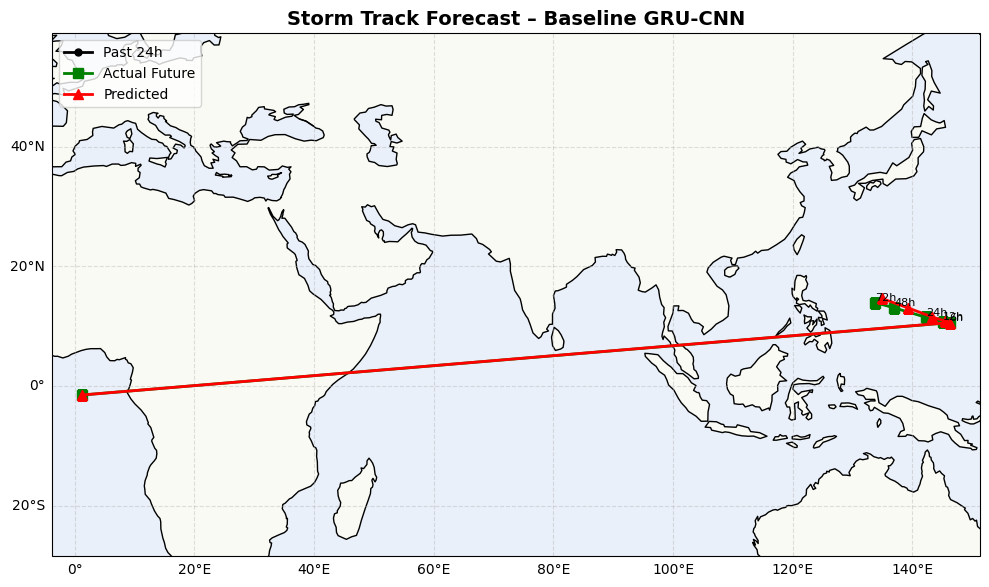

Plotting sample_idx: 1305


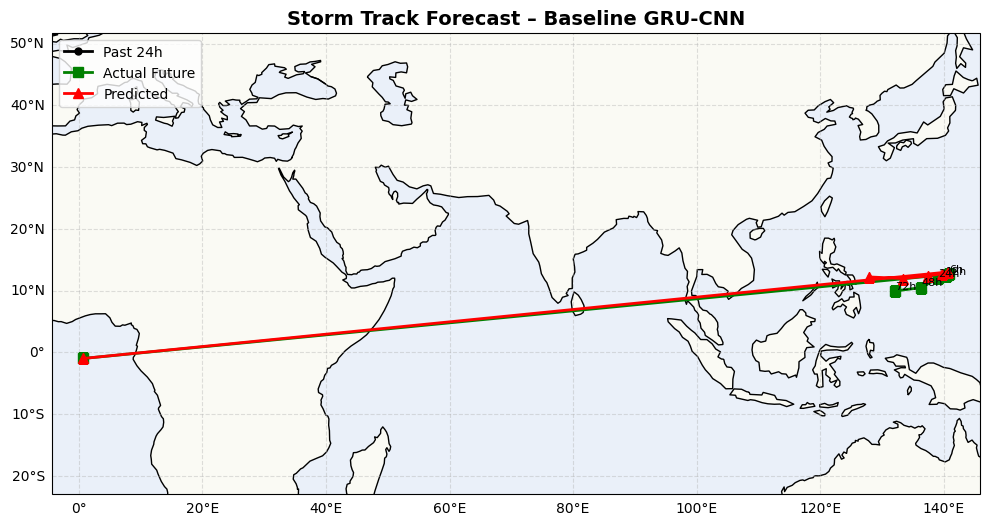

Plotting sample_idx: 2299


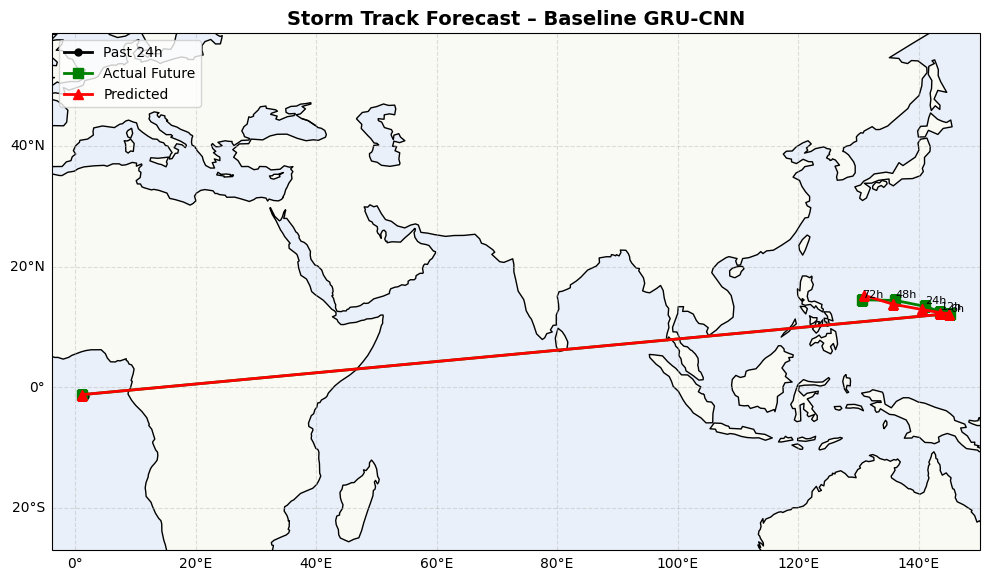

Plotting sample_idx: 726


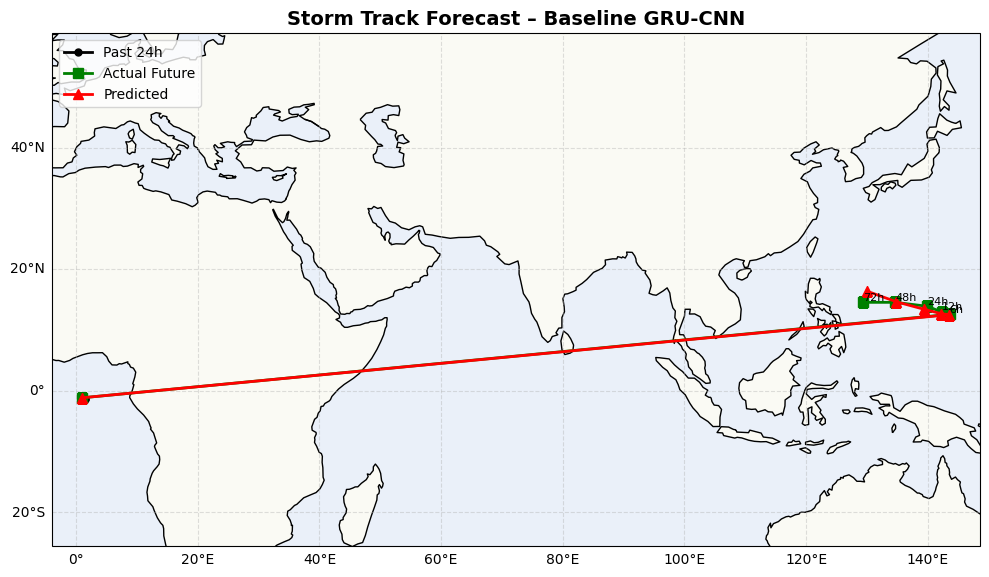

Plotting sample_idx: 2209


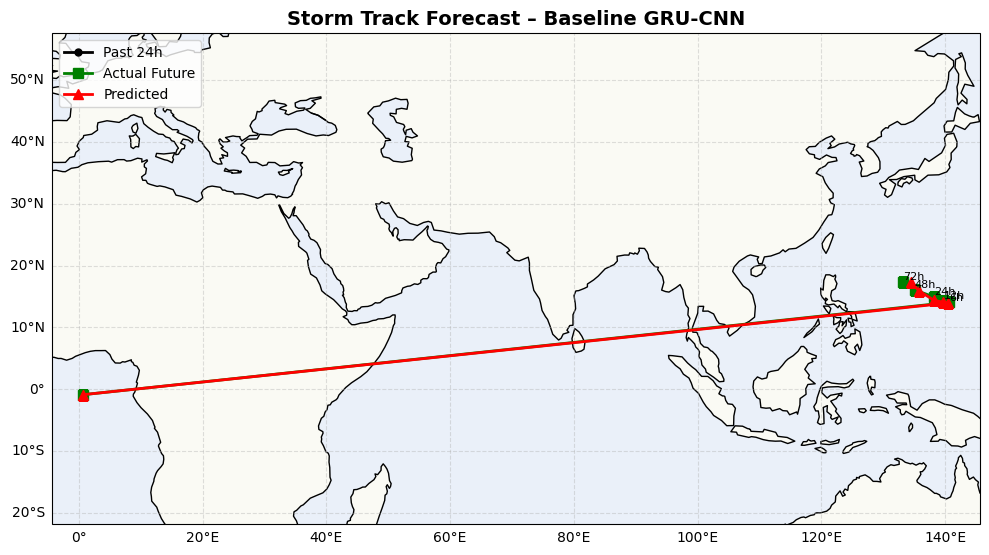

Plotting sample_idx: 1675


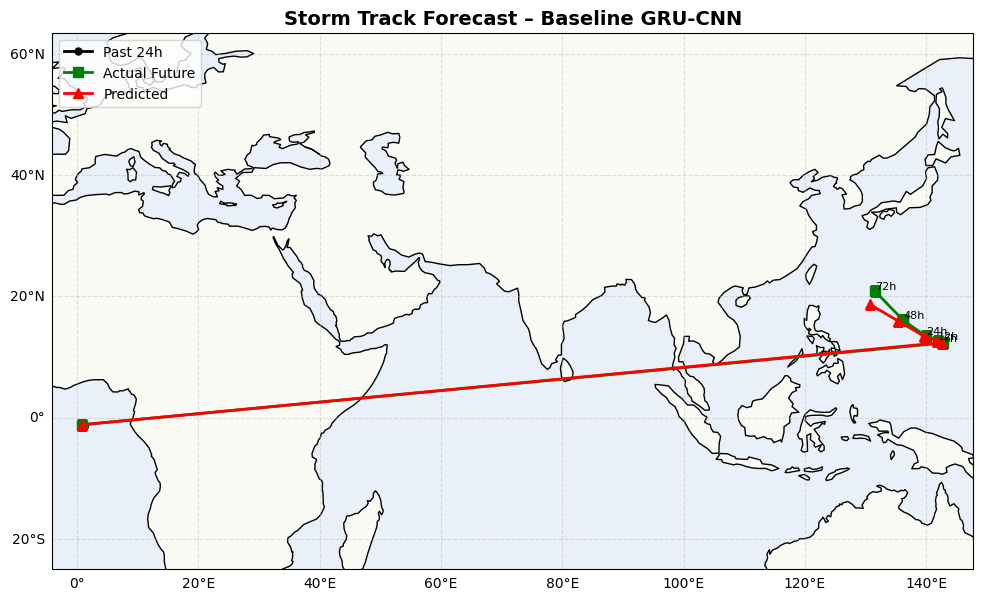

Plotting sample_idx: 2107


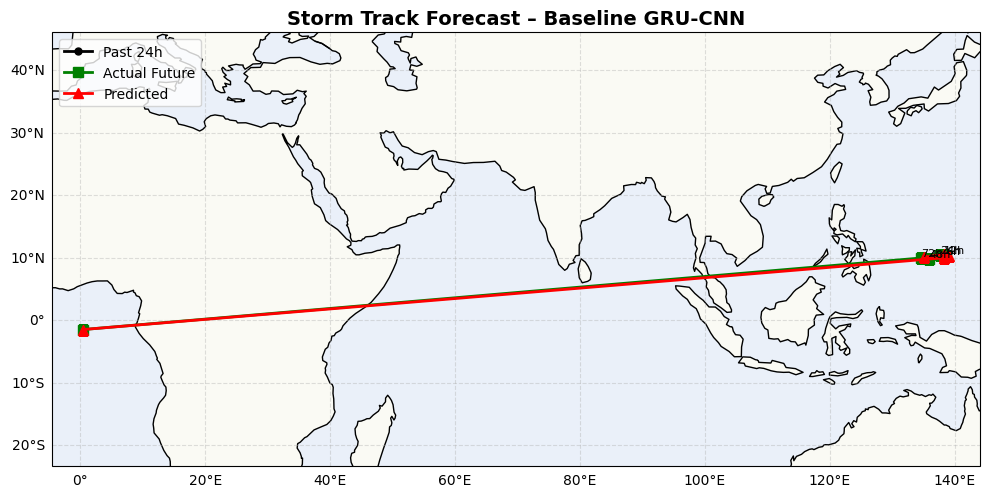

Plotting sample_idx: 1379


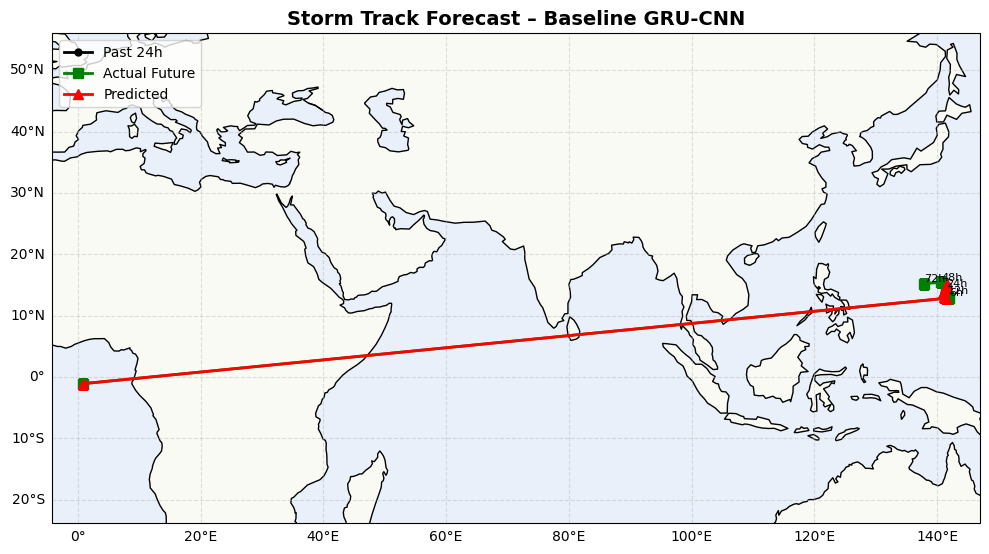

Plotting sample_idx: 124


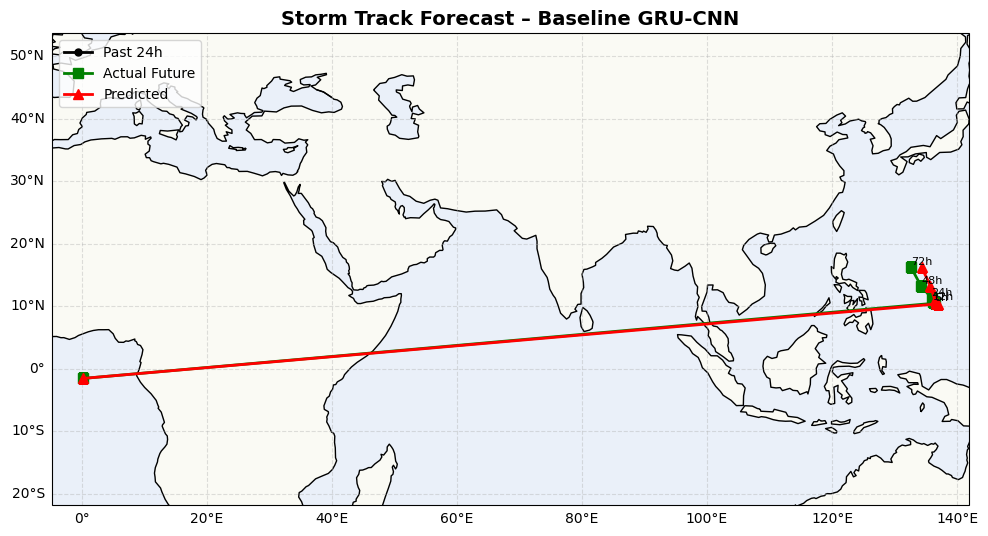

Plotting sample_idx: 672


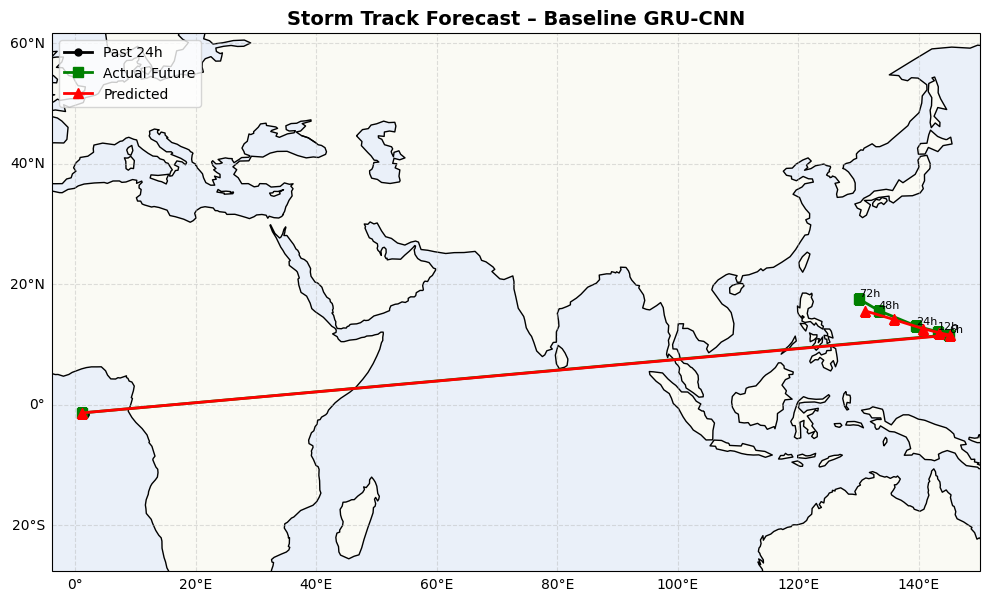

Plotting sample_idx: 228


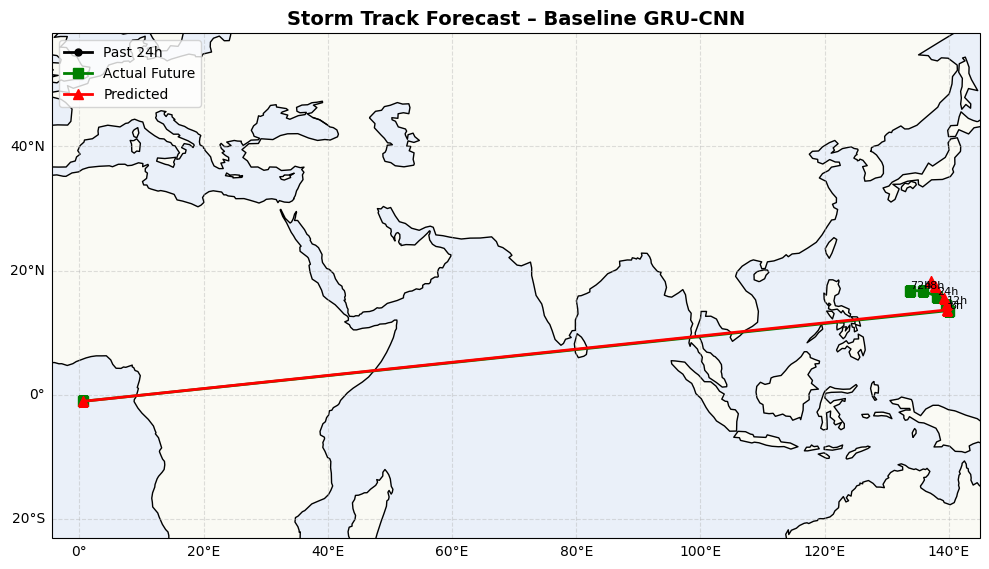

Plotting sample_idx: 853


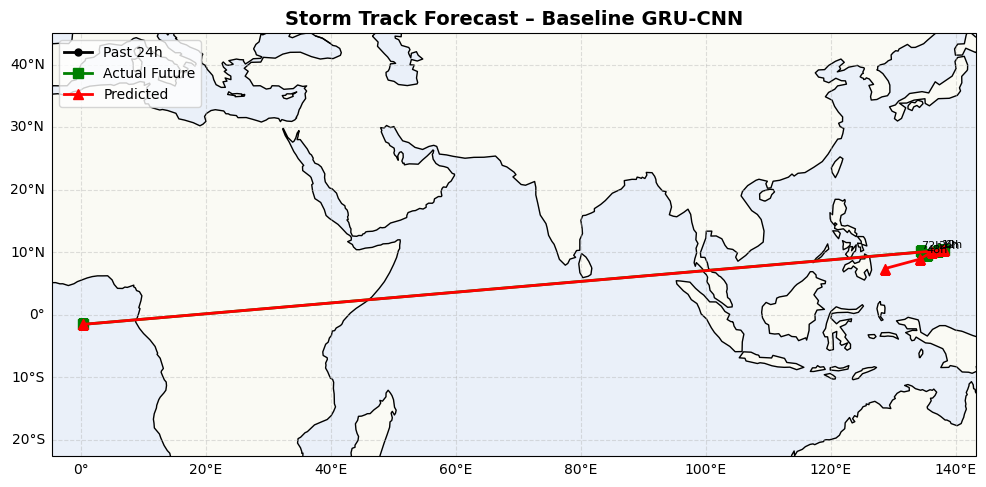

In [32]:
best_idx = errors_sorted[0][1]
plot_baseline_storm(sample_idx=best_idx)

for _, idx, _, _ in errors_sorted[20:40]:
    print("Plotting sample_idx:", idx)
    plot_baseline_storm(sample_idx=idx)

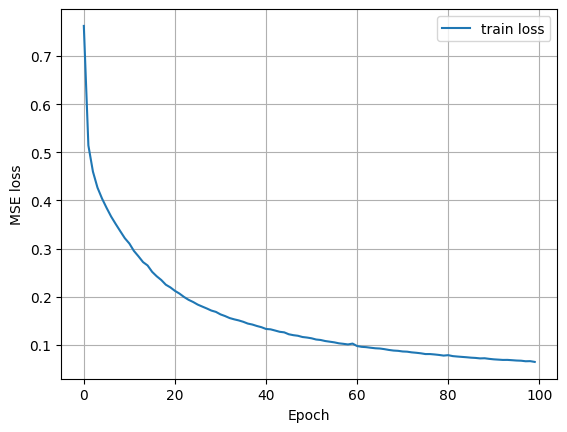

In [23]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.grid(True)
plt.show()